In [1]:
import sys
sys.path.append("..")
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  
import rbf_gauss
from scipy.io import savemat

In [10]:
# Load multisine data from matlab
mat = scipy.io.loadmat("u_data.mat")
u_data = mat["u_data"]

mat = scipy.io.loadmat("y_data.mat")
y_data = mat["y_data"]

# convert data to tensors
u_data = np.array(u_data)
y_data = np.array(y_data)

u_data = torch.FloatTensor(u_data).transpose(0,1)
y_data = torch.FloatTensor(y_data).transpose(0,1)

u_data.shape

torch.Size([10000, 1])

In [47]:
# Hyper parameters
T_ini = 5
n_basis = 60
T = 1000
in_features = T_ini * 2
out_features = n_basis
N = 50

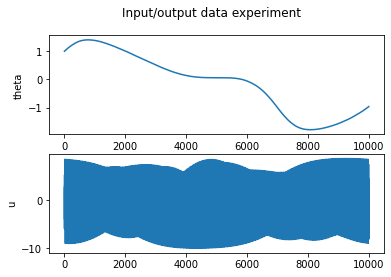

In [48]:
# Plot the pendulum trajectory together with the input
fig, axs = plt.subplots(2)
fig.suptitle("Input/output data experiment")
axs[0].plot(y_data[:,0])
axs[1].plot(u_data[:,0])
axs[0].set(ylabel="theta")
axs[1].set(ylabel="u")
plt.show()

In [49]:

N_training = list(y_data.shape)[0]

print(f"u_data = {(u_data).shape}")
print(f"y_data = {y_data.shape}")

U_ini = torch.transpose(u_data[0 : T_ini - 1], 0, 1)
U_0_Nm1 = torch.transpose(u_data[T_ini - 1 : T_ini + N - 1], 0, 1)

Y_ini = torch.transpose(y_data[1 : T_ini + 1], 0, 1)
Y_1_N = torch.transpose(y_data[T_ini + 1 : T_ini + 1 + N], 0, 1)

for i in range(T - T_ini - 1 - N):
    if i < 100:
        print(i)
    U_ini = torch.cat((U_ini, torch.transpose(u_data[i + 1 : T_ini + i], 0, 1)), 0)
    u_loop = torch.transpose(u_data[T_ini + i : T_ini + i + N], 0, 1)
    U_0_Nm1 = torch.cat((U_0_Nm1, u_loop), 0)

    Y_ini = torch.cat((Y_ini, torch.transpose(y_data[i + 2 : T_ini + 2 + i], 0, 1)), 0)
    y_loop = torch.transpose(y_data[T_ini + 2 + i : T_ini + 2 + i + N], 0, 1)
    Y_1_N = torch.cat((Y_1_N, y_loop), 0)
    print(f"U_ini = {(U_ini).shape}")
    print(f"Y_ini = {(Y_ini).shape}")
    print(f"U_0_Nm1 = {(U_0_Nm1).shape}")

X = torch.cat((U_ini, Y_ini, U_0_Nm1), 1)
y = Y_1_N
print(f"X = {(X).shape}")
print(f"y = {(y).shape}")


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=41)


print(f"X_train = {(X_train).shape}")
print(f"X_test = {(X_test).shape}")

u_data = torch.Size([10000, 1])
y_data = torch.Size([10000, 1])
0
U_ini = torch.Size([2, 4])
Y_ini = torch.Size([2, 5])
U_0_Nm1 = torch.Size([2, 50])
1
U_ini = torch.Size([3, 4])
Y_ini = torch.Size([3, 5])
U_0_Nm1 = torch.Size([3, 50])
2
U_ini = torch.Size([4, 4])
Y_ini = torch.Size([4, 5])
U_0_Nm1 = torch.Size([4, 50])
3
U_ini = torch.Size([5, 4])
Y_ini = torch.Size([5, 5])
U_0_Nm1 = torch.Size([5, 50])
4
U_ini = torch.Size([6, 4])
Y_ini = torch.Size([6, 5])
U_0_Nm1 = torch.Size([6, 50])
5
U_ini = torch.Size([7, 4])
Y_ini = torch.Size([7, 5])
U_0_Nm1 = torch.Size([7, 50])
6
U_ini = torch.Size([8, 4])
Y_ini = torch.Size([8, 5])
U_0_Nm1 = torch.Size([8, 50])
7
U_ini = torch.Size([9, 4])
Y_ini = torch.Size([9, 5])
U_0_Nm1 = torch.Size([9, 50])
8
U_ini = torch.Size([10, 4])
Y_ini = torch.Size([10, 5])
U_0_Nm1 = torch.Size([10, 50])
9
U_ini = torch.Size([11, 4])
Y_ini = torch.Size([11, 5])
U_0_Nm1 = torch.Size([11, 50])
10
U_ini = torch.Size([12, 4])
Y_ini = torch.Size([12, 5])
U_0_Nm1 = t

U_ini = torch.Size([218, 4])
Y_ini = torch.Size([218, 5])
U_0_Nm1 = torch.Size([218, 50])
U_ini = torch.Size([219, 4])
Y_ini = torch.Size([219, 5])
U_0_Nm1 = torch.Size([219, 50])
U_ini = torch.Size([220, 4])
Y_ini = torch.Size([220, 5])
U_0_Nm1 = torch.Size([220, 50])
U_ini = torch.Size([221, 4])
Y_ini = torch.Size([221, 5])
U_0_Nm1 = torch.Size([221, 50])
U_ini = torch.Size([222, 4])
Y_ini = torch.Size([222, 5])
U_0_Nm1 = torch.Size([222, 50])
U_ini = torch.Size([223, 4])
Y_ini = torch.Size([223, 5])
U_0_Nm1 = torch.Size([223, 50])
U_ini = torch.Size([224, 4])
Y_ini = torch.Size([224, 5])
U_0_Nm1 = torch.Size([224, 50])
U_ini = torch.Size([225, 4])
Y_ini = torch.Size([225, 5])
U_0_Nm1 = torch.Size([225, 50])
U_ini = torch.Size([226, 4])
Y_ini = torch.Size([226, 5])
U_0_Nm1 = torch.Size([226, 50])
U_ini = torch.Size([227, 4])
Y_ini = torch.Size([227, 5])
U_0_Nm1 = torch.Size([227, 50])
U_ini = torch.Size([228, 4])
Y_ini = torch.Size([228, 5])
U_0_Nm1 = torch.Size([228, 50])
U_ini = to

U_0_Nm1 = torch.Size([454, 50])
U_ini = torch.Size([455, 4])
Y_ini = torch.Size([455, 5])
U_0_Nm1 = torch.Size([455, 50])
U_ini = torch.Size([456, 4])
Y_ini = torch.Size([456, 5])
U_0_Nm1 = torch.Size([456, 50])
U_ini = torch.Size([457, 4])
Y_ini = torch.Size([457, 5])
U_0_Nm1 = torch.Size([457, 50])
U_ini = torch.Size([458, 4])
Y_ini = torch.Size([458, 5])
U_0_Nm1 = torch.Size([458, 50])
U_ini = torch.Size([459, 4])
Y_ini = torch.Size([459, 5])
U_0_Nm1 = torch.Size([459, 50])
U_ini = torch.Size([460, 4])
Y_ini = torch.Size([460, 5])
U_0_Nm1 = torch.Size([460, 50])
U_ini = torch.Size([461, 4])
Y_ini = torch.Size([461, 5])
U_0_Nm1 = torch.Size([461, 50])
U_ini = torch.Size([462, 4])
Y_ini = torch.Size([462, 5])
U_0_Nm1 = torch.Size([462, 50])
U_ini = torch.Size([463, 4])
Y_ini = torch.Size([463, 5])
U_0_Nm1 = torch.Size([463, 50])
U_ini = torch.Size([464, 4])
Y_ini = torch.Size([464, 5])
U_0_Nm1 = torch.Size([464, 50])
U_ini = torch.Size([465, 4])
Y_ini = torch.Size([465, 5])
U_0_Nm1 = 

U_ini = torch.Size([705, 4])
Y_ini = torch.Size([705, 5])
U_0_Nm1 = torch.Size([705, 50])
U_ini = torch.Size([706, 4])
Y_ini = torch.Size([706, 5])
U_0_Nm1 = torch.Size([706, 50])
U_ini = torch.Size([707, 4])
Y_ini = torch.Size([707, 5])
U_0_Nm1 = torch.Size([707, 50])
U_ini = torch.Size([708, 4])
Y_ini = torch.Size([708, 5])
U_0_Nm1 = torch.Size([708, 50])
U_ini = torch.Size([709, 4])
Y_ini = torch.Size([709, 5])
U_0_Nm1 = torch.Size([709, 50])
U_ini = torch.Size([710, 4])
Y_ini = torch.Size([710, 5])
U_0_Nm1 = torch.Size([710, 50])
U_ini = torch.Size([711, 4])
Y_ini = torch.Size([711, 5])
U_0_Nm1 = torch.Size([711, 50])
U_ini = torch.Size([712, 4])
Y_ini = torch.Size([712, 5])
U_0_Nm1 = torch.Size([712, 50])
U_ini = torch.Size([713, 4])
Y_ini = torch.Size([713, 5])
U_0_Nm1 = torch.Size([713, 50])
U_ini = torch.Size([714, 4])
Y_ini = torch.Size([714, 5])
U_0_Nm1 = torch.Size([714, 50])
U_ini = torch.Size([715, 4])
Y_ini = torch.Size([715, 5])
U_0_Nm1 = torch.Size([715, 50])
U_ini = to

U_ini = torch.Size([912, 4])
Y_ini = torch.Size([912, 5])
U_0_Nm1 = torch.Size([912, 50])
U_ini = torch.Size([913, 4])
Y_ini = torch.Size([913, 5])
U_0_Nm1 = torch.Size([913, 50])
U_ini = torch.Size([914, 4])
Y_ini = torch.Size([914, 5])
U_0_Nm1 = torch.Size([914, 50])
U_ini = torch.Size([915, 4])
Y_ini = torch.Size([915, 5])
U_0_Nm1 = torch.Size([915, 50])
U_ini = torch.Size([916, 4])
Y_ini = torch.Size([916, 5])
U_0_Nm1 = torch.Size([916, 50])
U_ini = torch.Size([917, 4])
Y_ini = torch.Size([917, 5])
U_0_Nm1 = torch.Size([917, 50])
U_ini = torch.Size([918, 4])
Y_ini = torch.Size([918, 5])
U_0_Nm1 = torch.Size([918, 50])
U_ini = torch.Size([919, 4])
Y_ini = torch.Size([919, 5])
U_0_Nm1 = torch.Size([919, 50])
U_ini = torch.Size([920, 4])
Y_ini = torch.Size([920, 5])
U_0_Nm1 = torch.Size([920, 50])
U_ini = torch.Size([921, 4])
Y_ini = torch.Size([921, 5])
U_0_Nm1 = torch.Size([921, 50])
U_ini = torch.Size([922, 4])
Y_ini = torch.Size([922, 5])
U_0_Nm1 = torch.Size([922, 50])
U_ini = to

In [50]:
X_train_1 = X_train[:, 0 : (2 * T_ini - 1)]
X_train_2 = X_train[:, (2 * T_ini - 1) :]

X_test_1 = X_test[:, 0 : (2 * T_ini - 1)]
X_test_2 = X_test[:, (2 * T_ini - 1) :]
print(f"X_train_1 = {(X_train_1).shape}")
print(f"X_train_2 = {(X_train_2).shape}")

X_train_1 = torch.Size([756, 9])
X_train_2 = torch.Size([756, 50])


In [51]:
class Model(nn.Module):
    def __init__(self, in_1_features, out_1_features, in_2_features, out_2_features):
        super().__init__()
        basis_func = rbf_gauss.RBF_gaussian.gaussian
        self.l_1 = rbf_gauss.RBF_gaussian(in_1_features, out_1_features,basis_func)
        self.l_2 = nn.Linear(in_2_features, out_2_features, bias=False)

    def forward(self, x1, x2):
        x1 = self.l_1(x1)
        x = torch.cat((x1, x2), 1)
        x = self.l_2(x)
        return x


In [53]:
# create a manual seed for randomization
torch.manual_seed(41)
# Create an instance of our model
model = Model((2 * T_ini - 1), (n_basis), (n_basis + N), (N))
# Set the criterion for our model to measure the error
criterion = nn.MSELoss()
# Choose Adam optimizer, lr = Learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=5e-5)

# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 10000
losses = []

for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train_1, X_train_2)  # get results

    # Measure the loss/error,
    loss = criterion(y_pred, y_train)

    # keep track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
        print(f"Epoch: {i} and the loss: {loss}")

    # Do some back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and the loss: 3.6188161373138428
Epoch: 10 and the loss: 0.9191585779190063
Epoch: 20 and the loss: 0.4662332534790039
Epoch: 30 and the loss: 0.5003176927566528
Epoch: 40 and the loss: 0.4482661485671997
Epoch: 50 and the loss: 0.43099531531333923
Epoch: 60 and the loss: 0.43151700496673584
Epoch: 70 and the loss: 0.4276788830757141
Epoch: 80 and the loss: 0.42746859788894653
Epoch: 90 and the loss: 0.4268510639667511
Epoch: 100 and the loss: 0.426540732383728
Epoch: 110 and the loss: 0.426209419965744
Epoch: 120 and the loss: 0.42589208483695984
Epoch: 130 and the loss: 0.4255680739879608
Epoch: 140 and the loss: 0.4252359867095947
Epoch: 150 and the loss: 0.424891859292984
Epoch: 160 and the loss: 0.4245375692844391
Epoch: 170 and the loss: 0.4241734743118286
Epoch: 180 and the loss: 0.42379969358444214
Epoch: 190 and the loss: 0.423416405916214
Epoch: 200 and the loss: 0.4230242371559143
Epoch: 210 and the loss: 0.42262348532676697
Epoch: 220 and the loss: 0.42221447825431

Epoch: 1850 and the loss: 0.3363138735294342
Epoch: 1860 and the loss: 0.33587613701820374
Epoch: 1870 and the loss: 0.3354485034942627
Epoch: 1880 and the loss: 0.3350209891796112
Epoch: 1890 and the loss: 0.33459892868995667
Epoch: 1900 and the loss: 0.33417290449142456
Epoch: 1910 and the loss: 0.3337351083755493
Epoch: 1920 and the loss: 0.3333113491535187
Epoch: 1930 and the loss: 0.332886278629303
Epoch: 1940 and the loss: 0.3324733078479767
Epoch: 1950 and the loss: 0.332053542137146
Epoch: 1960 and the loss: 0.33163967728614807
Epoch: 1970 and the loss: 0.33122676610946655
Epoch: 1980 and the loss: 0.3308204114437103
Epoch: 1990 and the loss: 0.33040428161621094
Epoch: 2000 and the loss: 0.32999783754348755
Epoch: 2010 and the loss: 0.3296055793762207
Epoch: 2020 and the loss: 0.3292185366153717
Epoch: 2030 and the loss: 0.32878920435905457
Epoch: 2040 and the loss: 0.32838189601898193
Epoch: 2050 and the loss: 0.32799065113067627
Epoch: 2060 and the loss: 0.3275846838951111
Ep

Epoch: 3660 and the loss: 0.285010427236557
Epoch: 3670 and the loss: 0.28493064641952515
Epoch: 3680 and the loss: 0.2847273349761963
Epoch: 3690 and the loss: 0.28456559777259827
Epoch: 3700 and the loss: 0.2844182848930359
Epoch: 3710 and the loss: 0.2843460738658905
Epoch: 3720 and the loss: 0.2841290533542633
Epoch: 3730 and the loss: 0.2839907705783844
Epoch: 3740 and the loss: 0.2838284969329834
Epoch: 3750 and the loss: 0.28377702832221985
Epoch: 3760 and the loss: 0.2835818827152252
Epoch: 3770 and the loss: 0.2834303081035614
Epoch: 3780 and the loss: 0.28332996368408203
Epoch: 3790 and the loss: 0.2832013666629791
Epoch: 3800 and the loss: 0.283201664686203
Epoch: 3810 and the loss: 0.2829738259315491
Epoch: 3820 and the loss: 0.2827732563018799
Epoch: 3830 and the loss: 0.28273820877075195
Epoch: 3840 and the loss: 0.2825332581996918
Epoch: 3850 and the loss: 0.2824080288410187
Epoch: 3860 and the loss: 0.2822897434234619
Epoch: 3870 and the loss: 0.28211086988449097
Epoch:

Epoch: 5480 and the loss: 0.27257001399993896
Epoch: 5490 and the loss: 0.2724311947822571
Epoch: 5500 and the loss: 0.27254635095596313
Epoch: 5510 and the loss: 0.27245742082595825
Epoch: 5520 and the loss: 0.2724226117134094
Epoch: 5530 and the loss: 0.2724432647228241
Epoch: 5540 and the loss: 0.27238598465919495
Epoch: 5550 and the loss: 0.2723686397075653
Epoch: 5560 and the loss: 0.272352933883667
Epoch: 5570 and the loss: 0.27235764265060425
Epoch: 5580 and the loss: 0.2723335325717926
Epoch: 5590 and the loss: 0.2722548246383667
Epoch: 5600 and the loss: 0.2722426950931549
Epoch: 5610 and the loss: 0.2722562551498413
Epoch: 5620 and the loss: 0.27221590280532837
Epoch: 5630 and the loss: 0.27220094203948975
Epoch: 5640 and the loss: 0.2721337676048279
Epoch: 5650 and the loss: 0.27224892377853394
Epoch: 5660 and the loss: 0.2721579372882843
Epoch: 5670 and the loss: 0.2721204459667206
Epoch: 5680 and the loss: 0.2720637321472168
Epoch: 5690 and the loss: 0.2720474302768707
Epo

Epoch: 7290 and the loss: 0.2712063491344452
Epoch: 7300 and the loss: 0.2712182104587555
Epoch: 7310 and the loss: 0.2711274325847626
Epoch: 7320 and the loss: 0.2710943818092346
Epoch: 7330 and the loss: 0.27110782265663147
Epoch: 7340 and the loss: 0.2712250053882599
Epoch: 7350 and the loss: 0.27120962738990784
Epoch: 7360 and the loss: 0.27112382650375366
Epoch: 7370 and the loss: 0.2711281478404999
Epoch: 7380 and the loss: 0.27132532000541687
Epoch: 7390 and the loss: 0.27130675315856934
Epoch: 7400 and the loss: 0.2712119519710541
Epoch: 7410 and the loss: 0.27115073800086975
Epoch: 7420 and the loss: 0.27129143476486206
Epoch: 7430 and the loss: 0.2712002992630005
Epoch: 7440 and the loss: 0.27118316292762756
Epoch: 7450 and the loss: 0.2711142599582672
Epoch: 7460 and the loss: 0.27110525965690613
Epoch: 7470 and the loss: 0.27111729979515076
Epoch: 7480 and the loss: 0.2711511552333832
Epoch: 7490 and the loss: 0.2711336016654968
Epoch: 7500 and the loss: 0.27108490467071533

Epoch: 9100 and the loss: 0.27107712626457214
Epoch: 9110 and the loss: 0.2710758149623871
Epoch: 9120 and the loss: 0.2711119055747986
Epoch: 9130 and the loss: 0.2711232006549835
Epoch: 9140 and the loss: 0.2710742652416229
Epoch: 9150 and the loss: 0.2710871398448944
Epoch: 9160 and the loss: 0.27119356393814087
Epoch: 9170 and the loss: 0.27105915546417236
Epoch: 9180 and the loss: 0.27106526494026184
Epoch: 9190 and the loss: 0.27117693424224854
Epoch: 9200 and the loss: 0.27116018533706665
Epoch: 9210 and the loss: 0.27111566066741943
Epoch: 9220 and the loss: 0.2710479199886322
Epoch: 9230 and the loss: 0.2711887061595917
Epoch: 9240 and the loss: 0.27104321122169495
Epoch: 9250 and the loss: 0.2710120975971222
Epoch: 9260 and the loss: 0.27115797996520996
Epoch: 9270 and the loss: 0.27115586400032043
Epoch: 9280 and the loss: 0.2710237205028534
Epoch: 9290 and the loss: 0.2710486352443695
Epoch: 9300 and the loss: 0.2710789740085602
Epoch: 9310 and the loss: 0.27104315161705017

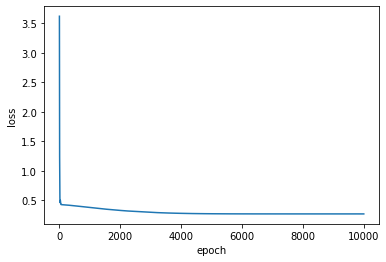

y_eval = tensor([[0.9642, 0.9630, 0.9665,  ..., 0.9707, 0.9749, 0.9715],
        [0.4675, 0.4691, 0.4660,  ..., 0.4759, 0.4721, 0.4758],
        [1.5975, 1.5986, 1.5964,  ..., 1.5999, 1.5971, 1.5996],
        ...,
        [1.4021, 1.4032, 1.4010,  ..., 1.4087, 1.4058, 1.4085],
        [0.9942, 0.9937, 0.9955,  ..., 1.0013, 1.0035, 1.0018],
        [0.0926, 0.0940, 0.0912,  ..., 0.0988, 0.0953, 0.0986]])
y_test = tensor([[1.3375, 1.3379, 1.3384,  ..., 1.3568, 1.3571, 1.3575],
        [1.1769, 1.1777, 1.1785,  ..., 1.2129, 1.2136, 1.2143],
        [1.4012, 1.4012, 1.4012,  ..., 1.3976, 1.3975, 1.3974],
        ...,
        [1.3975, 1.3976, 1.3977,  ..., 1.4016, 1.4017, 1.4018],
        [1.3428, 1.3432, 1.3436,  ..., 1.3612, 1.3616, 1.3619],
        [1.0468, 1.0477, 1.0487,  ..., 1.0912, 1.0921, 1.0930]])
y_eval-y_test = tensor([[-0.3732, -0.3749, -0.3719,  ..., -0.3860, -0.3822, -0.3860],
        [-0.7094, -0.7086, -0.7125,  ..., -0.7369, -0.7415, -0.7386],
        [ 0.1963,  0.1974,  0.

In [54]:
# create a plot
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

# evaluate the model on the test data set
with torch.no_grad():  # turn off backpropagation
    y_eval = model.forward(X_test_1, X_test_2)  # are features from our test set
    loss = criterion(y_eval, y_test)  # Find the loss or error

# print the predicted output and the test data
print(f"y_eval = {y_eval}")
print(f"y_test = {y_test}")
print(f"y_eval-y_test = {y_eval-y_test}")


print("test 1")

# Convert the model parameters to numpy arrays
centers = model.l_1.centers.detach().numpy()
log_sigmas = model.l_1.log_sigmas.detach().numpy()
weight = model.l_2.weight.detach().numpy()

print("test 2")
# save the parameters for use in matlab
# convert parameters to arrays so they can be saved as .mat files
centers = {"centers": centers}
log_sigmas = {"log_sigmas": log_sigmas}
weight = {"weight": weight}
X_test = {"X_test": X_test}
y_test = {"y_test": y_test}

print("test 3")

# save as .mat file

savemat(
    "centers.mat",
    centers,
)
savemat(
    "log_sigmas.mat",
    log_sigmas,
)
# savemat(r"weight.mat", weight)


print(f"u_data = {u_data}")
print(f"u_data.shape = {u_data.shape}")

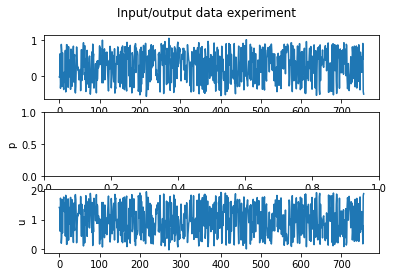

In [55]:
fig, axs = plt.subplots(3)
fig.suptitle("Input/output data experiment")
axs[0].plot(y_train[:,1]-y_pred[:,1].detach().numpy())
#axs[1].plot(y_data[:,1])
axs[2].plot(y_pred[:,1].detach().numpy())
axs[1].set(ylabel="p")
#axs[1].set(ylabel="theta")
axs[2].set(ylabel="u")
plt.show()